# Ma Chi Franklin

## MTH9875 Homework 6

Assigned: September 29, 2016.
Due: October 13, 2016 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### Download some R-code

The following code sources *BlackScholes.R* which has the Black-Scholes formula and implied volatility computation and *Heston2.R* which has in particular the *impvolHeston* function.

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/10/9875-5.zip", destfile="9875-5.zip")
unzip(zipfile="9875-5.zip")
source("BlackScholes.R")

### 0. (0 points) 

Read Chapter 6 of The Volatility Surface. 

## The Kou double-exponential jump diffusion model


In the Kou model, the underlying follows a jump-diffusion process of the form

$$
x_t=\alpha\,t+\sigma\,W_t+\sum_{i=1}^{N_t}\,y_i
$$

where $\{N_t\}$ is the Poisson process counting the jumps of $x$ and $y_i$ are jump sizes.  The distribution of jump sizes is an asymmetric exponential with density

<a name="eq:KouDensity"></a>(1)
$$
\nu(x)=p\,\lambda_+\,e^{-\lambda_+\,x}\,{\bf 1}_{x>0}+(1-p)\,\lambda_-\,e^{+\lambda_-\,x}\,{\bf 1}_{x \leq 0}.
$$

### 1. (2 points)

Conditional on an up-jump, what is the expected size of the jump?


$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
$$



### Solution 1

The conditional expectation is,

\begin{eqnarray}
\E[x\,|\,x \gt 0] &=& \frac{\int_{0}^{\infty}\,x\,p\,\lambda_+\,e^{-\lambda_+\,x}\,dx}{\int_{0}^{\infty}\,p\,\lambda_+\,e^{-\lambda_+\,x}\,dx} \\
&=& -\int_{0}^{\infty}\,x\,de^{-\lambda_+\,x} (denominator = p)\\ 
&=& \int_{0}^{+\infty}\,e^{-\lambda_+\,x}\,dx\\
&=& \frac{1}{\lambda_+}
\end{eqnarray}

### 2. (8 points) 

Using the Lévy Khintchine formula, derive the characteristic function 
$
\phi_T(u)=\exp\{\psi(u)\,T\}
$
with

<a name="eq:KouPsi"></a>(2)
$$
\psi(u)=-\frac{\sigma^2}{2}\,u^2+i\,\omega\,u+i\,u\,\lambda\,\left\{\frac{p}{\lambda_+-i\,u}-\frac{1-p}{\lambda_-+i\,u}\right\}
$$

where $\lambda$ is the mean jump arrival rate and

$$
\omega=-\frac{\sigma^2}{2}-\lambda\,\left\{\frac{p}{\lambda_+-1}-\frac{1-p}{\lambda_-+1}\right\}.
$$

$\psi(u)$ is known as the *characteristic exponent* of the Lévy process.

### Solution 2

Lévy-Khintchine formula,

$$
\phi_T(u)=\exp\left\{i \,u\, \omega\, T -\frac{1}{2}u^2\, \sigma^2 T +T
\int \left[e^{i \,u \,\xi}-1\right]\mu(\xi)\,d\xi\right\}
$$

Density function in this case is,

$$
\mu(\xi)=\nu(x)=p\,\lambda_+\,e^{-\lambda_+\,x}\,{\bf 1}_{x>0}+(1-p)\,\lambda_-\,e^{+\lambda_-\,x}\,{\bf 1}_{x \leq 0}.
$$

And we have: $\int \mu(\xi)\,d\xi = \lambda$

In this case, we have
\begin{eqnarray}
\int \nu(x)\,dx &=& \int p\,\lambda_+\,e^{-\lambda_+\,x}\,{\bf 1}_{x>0}+(1-p)\,\lambda_-\,e^{+\lambda_-\,x}\,{\bf 1}_{x \leq 0}. dx \\
&=& \int_0^{+\infty} p\lambda_+ e^{-\lambda_+ x} dx + \int_{-\infty}^{0} (1 - p)\lambda_-e^{\lambda_- x} dx \\
&=& p + (1 - p) \\
&=& 1 = \lambda
\end{eqnarray}

we want to get closed form of integration part
\begin{eqnarray}
\int \left[e^{i \,u \,\xi}-1\right]\mu(\xi)\,d\xi &=& \frac{p\,\lambda_+}{\lambda_+ - i\,u} + \frac{(1-p)\,\lambda_-}{\lambda_- + i\,u} - \lambda \\
&=& \frac{p\,\lambda_+}{\lambda_+ - i\,u} + \frac{(1-p)\,\lambda_-}{\lambda_- + i\,u} - 1 \\
&=& \frac{p\,\lambda_+}{\lambda_+ - i\,u} + \frac{(1-p)\,\lambda_-}{\lambda_- + i\,u} - p - (1 - p) \\
&=& \frac{p\,i\,u}{\lambda_+ - i\,u} - \frac{(1-p)\,i\,u}{\lambda_- + i\,u} \\
&=& i\,u\,\lambda\,(\frac{p}{\lambda_+ - i\,u} - \frac{1 - p}{\lambda_- + i\,u})
\end{eqnarray}

Then, substitute this into Lévy Khintchine: 
\begin{eqnarray}
\phi_T(u) &=& \exp\left\{i \,u\, \omega\, T -\frac{1}{2}u^2\, \sigma^2 T +T
\int \left[e^{i \,u \,\xi}-1\right]\mu(\xi)\,d\xi\right\} \\
&=& \exp\left\{(i \,u\, \omega -\frac{1}{2}u^2\, \sigma^2 + \int \left[e^{i \,u\,\xi}-1\right]\mu(\xi)\,d\xi )\,T\right\} \\
&=& \exp\left\{(i \,u\, \omega -\frac{1}{2}u^2\, \sigma^2 +  i\,u\,\lambda\,(\frac{p}{\lambda_+ - i\,u} - \frac{1 - p}{\lambda_- + i\,u}))\,T\right\} \\
&=& \exp\{\psi(u)\,T\}
\end{eqnarray}

So, we have,
$$
\psi(u)=-\frac{\sigma^2}{2}\,u^2+i\,\omega\,u+i\,u\,\lambda\,\left\{\frac{p}{\lambda_+-i\,u}-\frac{1-p}{\lambda_-+i\,u}\right\}
$$

We have: $$\phi_T(-i)=\mathbb{E}\left[e^{x_T}\right]=1$$ 

Then $\psi(-i) = 0$, we have
$$
\psi(-i)= \frac{\sigma^2}{2} + \omega + \lambda\,\left\{\frac{p}{\lambda_+ - 1}-\frac{1-p}{\lambda_- + 1}\right\}
$$

so we have:
$$
\omega=-\frac{\sigma^2}{2}-\lambda\,\left\{\frac{p}{\lambda_+-1}-\frac{1-p}{\lambda_-+1}\right\}.
$$

### 3. (6 points) 

Use the characteristic exponent [(2)](#eq:KouPsi) and Lewis's formula (6) from the notes to plot the one-year implied volatility smile assuming the following parameters:

$$
\sigma=0.2; \,\lambda=1.0;\,p=0.25;\,\lambda_-=8;\,\lambda_+=25;
$$

The log-strike range should be from $k=-1.0$ to $k=1.0$.  

In [9]:
source("Heston2.R")

In [16]:
phiKou <- function(params)
{   
    sig <- params$sig
    lambda <- params$lambda
    p <- params$p
    lambdaM <- params$lambdaM
    lambdaP <- params$lambdaP
       
    res <- function(u, t)
    {
        omega <- -sig * sig / 2.0 - lambda * (p / (lambdaP - 1) - (1-p) / (lambdaM + 1))
        psi <- -sig * sig / 2.0 * u * u + (0+1i) * omega * u 
        psi <- psi + (0+1i) * u * lambda * ((p / (lambdaP - (0+1i) * u)) - (1-p) / (lambdaM + (0+1i) * u))
        
        res <- exp(psi * t)
        
        return(res)
    }
    
    return(res)
}

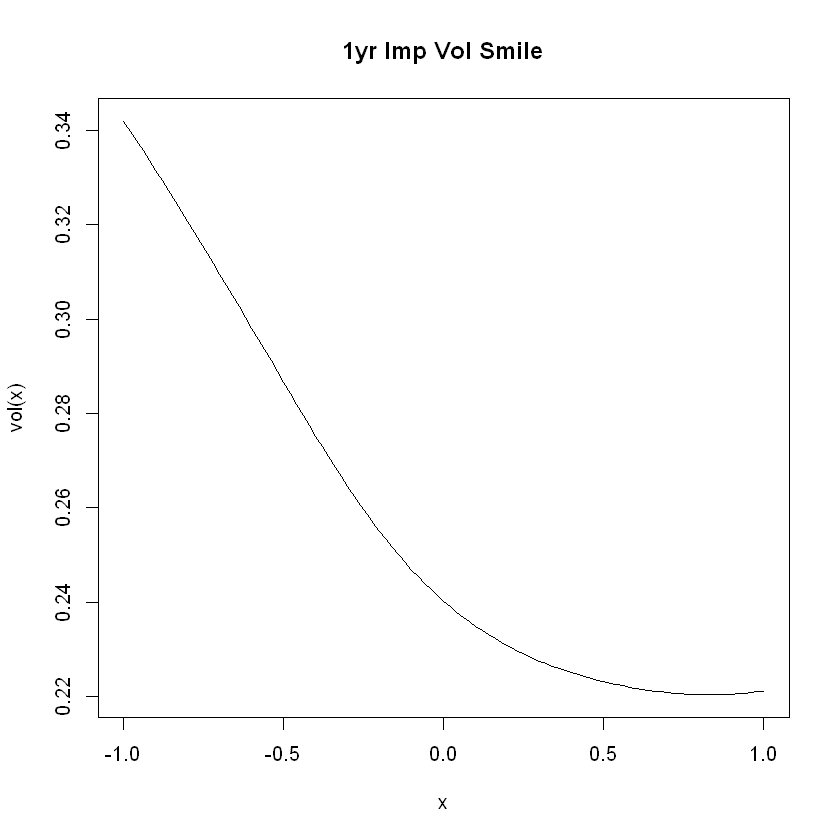

In [19]:
subKou <- list(sig = 0.2, lambda = 1.0, p = 0.25, lambdaM = 8.0, lambdaP = 25.0)
vol <- function(k){sapply(k,function(x){bsvol(phiKou(subKou),x,1)})}
curve(vol(x),from=-1.0,to=1.0, main = "1yr Imp Vol Smile")

## Jump-Diffusion Monte Carlo

### 4. (10 points) 

Write Monte Carlo code to price European options in the Kou model.  With the same parameters as in Problem 3, plot the one-year implied volatility smile from $k=-1.0$ to $k=1.0$.  Verify that you obtain the same implied volatilities.

In [20]:
calJumps <- function(n, p, lamp, lamm)
{
    res <- 0  # initialization
    
    if(n >0)
    {
        prob <- runif(n, min=0, max=1)
        lampV <- rep(lamp, n)
        lammV <- rep(lamm, n)
    
        lamV <- (prob < p) * lamp + (prob >= p) * lamm
    
        tmp <- rexp(n, rate=lamV)
        
        res <- sum((prob < p) * tmp - (prob >= p) * tmp)
    }

    return(res)
}


MCCallKou <- function(kouParams, k, T, paths=100000, steps=1)
{
    sig <- kouParams$sig
    lambda <- kouParams$lambda
    p <- kouParams$p
    lambdaM <- kouParams$lambdaM
    lambdaP <- kouParams$lambdaP
    
    alpha <- 0
    K <- exp(k)
    dt <- T / steps

    evolveK <- function(x)
    {
        BMs <- rnorm(paths)
        Nts <- rpois(paths, lambda * dt)
        BMs <- BMs - mean(BMs);  BMs <- BMs/sd(BMs)
        jumps <- sapply(Nts, function(Nt){calJumps(Nt, p, lambdaP, lambdaM)}) 
        x <- x + alpha * dt + sig * sqrt(dt) * BMs + jumps   
        x <- x - log(mean(exp(x))) 
        return(x)
    }

    x <- numeric(paths)
    for (i in 1:steps)
    {
        x <- evolveK(x)        
    }

    ST <- exp(x)
    payoff <- (ST > K) * (ST - K)
    res <- mean(payoff)
    return(res)
}

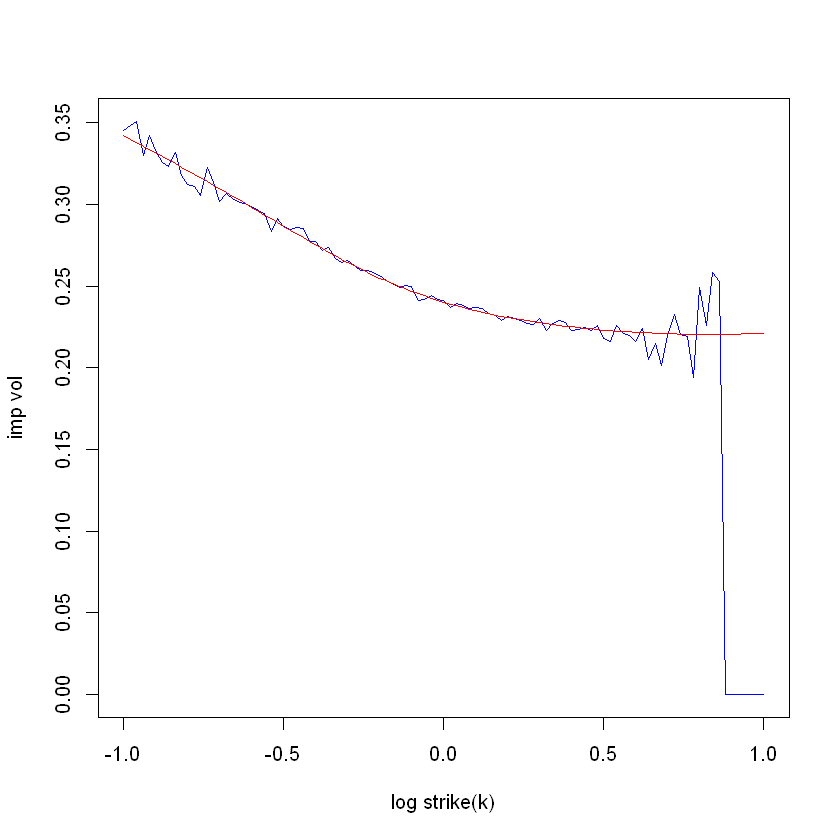

In [24]:
MCbsvol <- function(k){BSImpliedVolCall(1, exp(k), 1.0, 0, MCCallKou(subKou, k, 1.0, paths=10000))}

MCvol <- function(k){sapply(k,function(x){MCbsvol(x)})}

curve(MCvol(x),from=-1.0,to=1.0,col="blue", xlab="log strike(k)", ylab='imp vol')
curve(vol(x),from=-1.0,to=1.0,col="red", add=TRUE)

## Term structure of ATM skew

### 5.(4 points) 

Using formula (8) from the lecture notes:

\begin{equation}
\left.\frac{\partial \sigma_{BS} }{\partial k }\right|_{k=0}=-
e^{\frac{\sigma_{BS}^2 T}{8}} \sqrt{\frac{2}{ \pi}}\frac{1}{
\sqrt{T}}\,\int_0^\infty\,du \, \frac{u\,
\mathrm{Im}\left[\phi_T(u-i/2)\right]}
{u^2+\frac{1}{4}},
\end{equation}
plot the ATM volatility skew

$$
\left.\frac{\partial \sigma_{BS} }{\partial k }\right|_{k=0}
$$

from 0 to 10 years.  Superimpose the curve $a/\sqrt{T}$, setting $a$ so as to match the one-year ATM skew. 

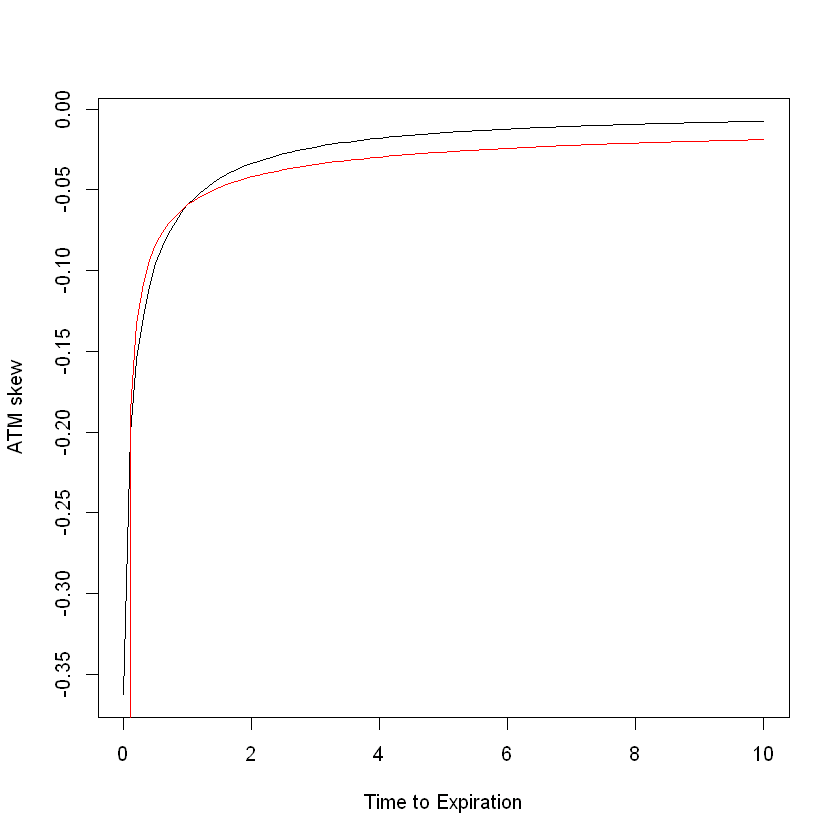

In [26]:
atmSkew <- function(phi, t){
    atmVol <- BSImpliedVolCall(S0=1, K=1, T=t, r=0, C=callOption(phi, 0, t));
    integrand <-  function(u){Im(u*phi(u - 1i/2, t)/(u^2 + 1/4))};
    res <- -integrate(integrand,lower=0,upper=Inf,rel.tol=1e-9,subdivisions=1000)$value/sqrt(t)*sqrt(2/pi)*exp(atmVol^2*t/8);
    return(res);
}

atmSkewV <- function(t){sapply(t, function(x){atmSkew(phiKou(subKou), x)})}

# Set alpha to match the one-year ATM skew
alpha <- atmSkew(phiKou(subKou), 1)

curve(atmSkewV(x),from=1e-5, to=10, col="black",xlab="Time to Expiration", ylab="ATM skew")
curve(alpha / sqrt(x), from=1e-5, to=10, col="red", add=TRUE)

## Qualitative assessment of the Kou model

### 6. (6 points)  

Make some clear qualitative comments directed at a non-specialist (*e.g.* your boss who is a trader) as to the suitability of the Kou model for pricing exotic derivatives.  Consider how realistic the process is and how well the model can fit the empirical volatility surface.

### Solution 6:
**Comments:**

1: The Kou Model is a diffusion process with jump process, where jump is possion process. By adding $\lambda_+$ and $\lambda_-$. and indicator functions (x > 0 or x < 0), we can analyze the asymmetrical performance of jump. Also we have that prob of larger jump is less than the prob of smaller jump. In other words, smaller jumps are more frequently.

2: In Imp Vol smile, addle point is shifted to right(around 0.75), meaning Kou model will overprice low strike derivatives and  underprice high strike derivatives.

3：In Monte Carlo simulation, there is noise for high strike due to relatively smaller call prices for high strike. 

4: In ATM skew term structure, Kou ATM skew term structure is faster to decay than square root model.

**Written by Chi Franklin Ma, Oct 10, 2016**